<a href="https://colab.research.google.com/github/jan-kreischer/EPFL_ANN_Projects/blob/main/Project-03/ex03_cnn_jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 - Language Identification (Reloaded and Convoluted)
## 1. Setup
### 1.1 Dependencies

In [1]:
!pip install talos

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 53 kB 1.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.8 MB 16.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.4 MB 20.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 51 kB 668 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.6 MB 20.9 MB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41609 sha256=d55712658d95684a14243dcbabf179693cb26ec6b0159ed2693310360ae13481
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-py3-none-any.whl size=3603 sha256=b20b3475347649c1a11639150e376a32f33f56d

In [2]:
!pip install demoji

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42 kB 1.1 MB/s 


In [3]:
!pip install googletrans==4.0.0rc1

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 55 kB 2.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.3 MB 15.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42 kB 1.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 53 kB 1.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65 kB 3.5 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=d71dce6e3c7c57cc19c8a1b987832ee5becdf0bce0e66991b26b183132226303
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans



### 1.2 Imports

In [139]:
import csv
import re
from io import StringIO
import requests
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
import warnings
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras import backend as K
from keras.callbacks import EarlyStopping
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import talos

#import talos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

from googletrans import Translator
translator = Translator()

import csv
import re
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 200)  
pd.set_option('display.max_columns', 200)   
pd.set_option('display.width', 4000)

import torch

from io import StringIO
import requests
import matplotlib.pyplot as plt

import demoji

from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### 1.2 Environment

In [5]:
# Check if device supports CUDA interface
CUDA = torch.cuda.is_available()
# Make program run on gpu (cuda:0) if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu:0')
torch.cuda.set_device(device)
print('Using device:', device)

Using device: cuda:0


In [6]:
# Check and print information about available GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov  2 06:59:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# Get GPU name
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-a388a977-dfb7-c9d3-4cec-d24429f7002c)


In [8]:
# Check Memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


### 1.4 Constants

In [42]:
TARGET_COLUMN = 'label'
TWEET_COLUMN = 'tweet'
SAMPLE_THRESHOLD = 20
MAX_SEQ_LEN = 80

## 2. Data Acquisition

In [10]:
url_train = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTOZ2rC82rhNsJduoyKYTsVeH6ukd7Bpxvxn_afOibn3R-eadZGXu82eCU9IRpl4CK_gefEGsYrA_oM/pub?gid=1863430984&single=true&output=tsv'
url_test = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-KNR9nuYatLkSbzSRgpz6Ku1n4TN4w6kKmFLkA6QJHTfQzmX0puBsLF7PAAQJQAxUpgruDd_RRgK7/pub?gid=417546901&single=true&output=tsv'

In [11]:
def load_dataset(url):
  r = requests.get(url)
  data = r.content.decode('utf8')
  df = pd.read_csv(StringIO(data), sep='\t')
  df.columns = ['tweet', 'label']
  return df

In [12]:
df_train = load_dataset(url_train)
df_test = load_dataset(url_test)

In [13]:
dataset = pd.concat([df_train, df_test], axis=0) # Merge into one dataset for the pre-processing

In [14]:
print("The length of the combined dataset is {0} training samples + {1} test samples = {2} samples".format(len(df_train), len(df_test), len(dataset)))

The length of the combined dataset is 52675 training samples + 13279 test samples = 65954 samples


In [15]:
dataset = dataset.sample(frac=1).reset_index(drop=True) # Randomly shuffle the data

In [16]:
dataset.head(10) # Show some sample tweets

tweet label
0                                        @CLOI_A „Öã„Öã„Öã    ko
1  Megaespecial Fairy Tail 3/150. Admin Sirene ht...   und
2                             http://t.co/0EeyF6Hk1Z   und
3  RNS RT @Dame_Lillard: I always find myself wat...    en
4  ¬°He reunido 29,015 monedas de oro! ¬øA ver quie...    es
5  „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†...    ko
6         ‡πÑ‡∏≠‡πâ‡∏™‡∏∏‡∏Å‡∏Ç‡πâ‡∏≤‡∏™‡∏ß‡∏¢‡∏°‡∏±‡πâ‡∏¢‡πÄ‡∏≠‡∏á‡∏£‡∏π‡∏õ‡∏ï‡∏±‡∏ß‡πÄ‡∏≠‡∏á‡∏Ç‡∏∂‡πâ‡∏ô‡πÄ‡∏•‡∏¢‡∏ô‡∏∞ #Ìà¨ÌïòÌä∏    th
7  Ngimpi koe tapi kok iseh seneng karo mantan, y...    id
8  http://t.co/eIwlijGogj Vertebrate Palaeontolog...   und
9  1 Shakifans x Ritabots #MTVHottest Rita Ora #M...   und

## 3. Data Exploration

In [17]:
def data_exploration(df):
  n_labels = len(np.unique(df["label"]))
  df = df.sort_values('label')
  print("Dataset contains the columns: {}".format(list(df.keys())))
  print("with a total of {} observations".format(len(df)))
  print("and {} different possible labels.".format(n_labels))
  print("The unique labels are {}".format(df["label"].unique()))
  plt.figure(figsize=(15, 3))
  plt.hist(df["label"], bins=n_labels)
  plt.xticks(rotation=90)
  plt.yscale("log")
  plt.xlabel("Language")
  plt.ylabel("#Occurences")
  plt.show()

In [18]:
# This function checks which lanugages occur in the full dataset less than 'SAMPLE_THRESHOLD' times.
# These languages are then returned as the list of underrepresented languages
def get_underrepresented_languages(df, target_column, sample_threshold):
    df = df.groupby(target_column).size().to_frame().reset_index(drop=False).rename(columns={0: 'occurences'})
    underrepresented_languages = list(df[df['occurences'] < SAMPLE_THRESHOLD][target_column])
    return underrepresented_languages

In [19]:
def print_number_of_underrepresented_languages(df, target_column, sample_threshold):
  underrepresented_languages = get_underrepresented_languages(df, target_column, sample_threshold)
  print("There are {} languages in this data set with less then {} samples.".format(len(underrepresented_languages), sample_threshold))

Dataset contains the columns: ['tweet', 'label']
with a total of 65954 observations
and 78 different possible labels.
The unique labels are ['ar' 'ar_LATN' 'az' 'bg' 'bn' 'bs' 'ca' 'cs' 'cy' 'da' 'de' 'dv' 'el'
 'en' 'es' 'et' 'eu' 'fa' 'fi' 'fr' 'gl' 'ha' 'he' 'hi' 'hi-Latn' 'hr'
 'ht' 'hu' 'hy' 'id' 'is' 'it' 'ja' 'ja_LATN' 'jv' 'km' 'ko' 'ko_LATN'
 'la' 'lv' 'mk' 'mn' 'mr' 'ms' 'ne' 'nl' 'no' 'pl' 'ps' 'ps_LATN' 'pt'
 'ro' 'ru' 'si' 'sk' 'sl' 'sq' 'sr' 'su' 'sv' 'sw' 'ta' 'ta_LATN' 'th'
 'tl' 'tn' 'tr' 'uk' 'und' 'ur' 'ur_LATN' 'vi' 'wo' 'xh' 'yo' 'zh-CN'
 'zh-TW' 'zu']


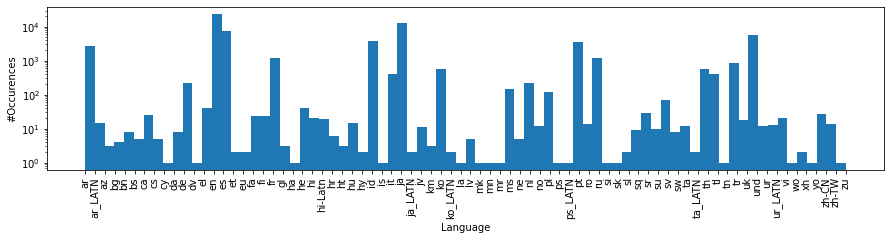

In [20]:
data_exploration(dataset)

In [21]:
print_number_of_underrepresented_languages(dataset, TARGET_COLUMN, SAMPLE_THRESHOLD)

There are 50 languages in this data set with less then 20 samples.


In [22]:
# Display all languages and their absolute number off occurences in descending order
language_count=dataset[TARGET_COLUMN].value_counts().reset_index()
language_count
df = pd.DataFrame(language_count)
df.columns = ['language', 'occurences']
df

language  occurences
0        en       23266
1        ja       12899
2        es        7406
3       und        5766
4        id        3823
5        pt        3577
6        ar        2728
7        ru        1221
8        fr        1170
9        tr         843
10       ko         568
11       th         560
12       it         415
13       tl         409
14       nl         225
15       de         221
16       ms         150
17       pl         119
18       sv          69
19       he          41
20       el          39
21       sr          29
22    zh-CN          26
23       ca          25
24       fa          23
25       fi          23
26       vi          21
27       hi          20
28  hi-Latn          19
29       uk          18
30       hu          15
31  ar_LATN          15
32       ro          14
33    zh-TW          14
34  ur_LATN          13
35       ur          12
36       ta          12
37       no          12
38       jv          11
39       su          10
40       sq           9
41       sw           8
42       da           8
43       bn           8
44       hr           6
45       bs           5
46       lv           5
47       cs           5
48       ne           5
49       bg           4
50       az           3
51       km           3
52       ht           3
53       gl           3
54  ja_LATN           2
55       hy           2
56  ta_LATN           2
57  ko_LATN           2
58       et           2
59       eu           2
60       sl           2
61       xh           2
62       wo           1
63  ps_LATN           1
64       zu           1
65       mn           1
66       la           1
67       ps           1
68       dv           1
69       mk           1
70       ha           1
71       is           1
72       yo           1
73       mr           1
74       si           1
75       cy           1
76       sk           1
77       tn           1

## 4. Text Cleaning

This is generally a good idea as many text classification tools rely on counting the occurrences of words. If both upper and lower case versions of the same word are found in the text then the algorithm will count them as different words even though the meaning is the same. Of course this does mean that where the capitalised versions of a word exists, that does have a different meaning. For example the company Apple vs the fruit apple. This could result in poorer performance for some data sets. This is one area of NLP where you may try different methods to see how they affect the overall performance of the model. We decided to transform our corpus into lowercase, since the case wont have
a big influence on the language classification performance

In [23]:
def remove_all_emojis(text):
  dem = demoji.findall(text)
  for item in dem.keys():
    text = text.replace(item, '')
  return text

In [24]:
def clean_data(df, column):
    df = df.copy(deep=True) # Make deep copy of tweets
    df[column] = df[column].str.lower() # Transform into all lowercase
    
    patterns = []
    retweet_pattern = '^RT'
    patterns.append(retweet_pattern)
    xml_pattern = '&\S+;'
    patterns.append(xml_pattern)
    hashtag_pattern = '#[A-Za-z0-9_]+'
    patterns.append(hashtag_pattern)
    twitter_mention_pattern = '@[A-Za-z0-9_]+'
    patterns.append(twitter_mention_pattern)
    http_pattern = 'http\S+'
    patterns.append(http_pattern)
    www_pattern = 'www\S+'
    patterns.append(www_pattern)
    tab_pattern = '\t'
    patterns.append(tab_pattern)
    punctuation_pattern = '[!"#$%&\\()*+,-./:;<=>?@\[\]^_`\'{}~]+'
    patterns.append(punctuation_pattern)
    numeric_pattern = '[0-9]+'
    patterns.append(numeric_pattern)
    regex = "|".join(patterns)

    #df[column] = df[column].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem)) 
    df[column] = df[column].apply(lambda elem: re.sub(r"{}".format(regex), "", elem))
    df[column] = df[column].apply(remove_all_emojis)
    
    return df

In [25]:
# Now we want to find out which special characters need to be removed from tweets in order to make the prediction better.
# We go over the printed list an not down the symbold which are not needed for language identification.
# These will be removed in a later step.
languages = list(np.unique(dataset[TARGET_COLUMN]))
for language in languages:
  localized_tweets = dataset[dataset[TARGET_COLUMN] == language]
  # Clean and compare them
  cleaned_localized_tweets = clean_data(localized_tweets, TWEET_COLUMN)
  comparison_view = pd.concat([localized_tweets.drop([TARGET_COLUMN], axis=1), cleaned_localized_tweets], axis=1)
  print(comparison_view.head(5))
  #print(localized_tweets.head(5))
  print("---")

# Symbols like @<mention>, #, http://link !, numeric values (e.g 16000), " do not help for language identification.

                                                 tweet                                              tweet label
14   {ŸÉŸÖÿ´ŸÑ ÿßŸÑÿ¥Ÿäÿ∑ÿßŸÜ ÿ•ÿ∞ ŸÇÿßŸÑ ŸÑŸÑÿ•ŸÜÿ≥ÿßŸÜ ÿßŸÉŸÅÿ± ŸÅŸÑŸÖÿß ŸÉŸÅÿ± ŸÇÿßŸÑ...  ŸÉŸÖÿ´ŸÑ ÿßŸÑÿ¥Ÿäÿ∑ÿßŸÜ ÿ•ÿ∞ ŸÇÿßŸÑ ŸÑŸÑÿ•ŸÜÿ≥ÿßŸÜ ÿßŸÉŸÅÿ± ŸÅŸÑŸÖÿß ŸÉŸÅÿ± ŸÇÿßŸÑ ...    ar
23                          ŸàÿµÿØŸÇŸÜŸä ÿßŸÑÿØŸÜŸäÿß ÿØŸä ŸÖÿ™ÿ≥Ÿàÿßÿ¥.!!                            ŸàÿµÿØŸÇŸÜŸä ÿßŸÑÿØŸÜŸäÿß ÿØŸä ŸÖÿ™ÿ≥Ÿàÿßÿ¥    ar
46   @Neeef17  Ÿäÿßÿ≠ÿ±ÿ±ÿ±ÿ±ÿßŸÖ ŸàŸÇŸÅŸàŸá ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...    Ÿäÿßÿ≠ÿ±ÿ±ÿ±ÿ±ÿßŸÖ ŸàŸÇŸÅŸàŸá ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...    ar
113  Ÿäÿß ÿ≠Ÿä Ÿäÿß ŸÇŸäŸàŸÖ ÿ®ÿ±ÿ≠ŸÖÿ™ŸÉ ÿ£ÿ≥ÿ™ÿ∫Ÿäÿ´ ÿ£ÿµŸÑÿ≠ ŸÑŸä ÿ¥ÿ£ŸÜŸä ŸÉŸèŸÑŸá ...  Ÿäÿß ÿ≠Ÿä Ÿäÿß ŸÇŸäŸàŸÖ ÿ®ÿ±ÿ≠ŸÖÿ™ŸÉ ÿ£ÿ≥ÿ™ÿ∫Ÿäÿ´ ÿ£ÿµŸÑÿ≠ ŸÑŸä ÿ¥ÿ£ŸÜŸä ŸÉŸèŸÑŸá ...    ar
115  ÿ∞ŸÉÿ± ÿßŸÑŸÑŸá Ÿäÿ±ÿ∂Ÿä ÿßŸÑÿ±ÿ≠ŸÖŸÜ ŸàŸäÿ≥ÿπÿØ ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜ ŸàŸäÿ∞Ÿáÿ® ÿßŸÑÿ£ÿ≠ÿ≤...  ÿ∞ŸÉÿ± ÿßŸÑŸÑŸá Ÿäÿ±ÿ∂Ÿä ÿßŸÑÿ±ÿ≠ŸÖŸÜ ŸàŸäÿ≥ÿπÿØ ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜ ŸàŸäÿ∞Ÿáÿ® ÿßŸÑÿ£ÿ≠

In [26]:
cleaned_dataset = clean_data(dataset, TWEET_COLUMN)

In [27]:
# Check that the dataset does not contain null values
cleaned_dataset.isnull().values.any() 

False

## 5.Data Augmentation
We consider languages which have less then 20 sample tweets in the dataset as infrequent. You can either remove these infrequent languages or use augmentation or upsampling techniques to increase the language frequency.
We decided to use back translation in order to keep infrequent languages but increase their frequency.


In [28]:
def back_translation(df,target_languages=['en']):
  translated_data = pd.DataFrame(columns={TWEET_COLUMN, TARGET_COLUMN})
  for target_language in target_languages:
    for index, row in df.iterrows():
      try:
        tweet = row[TWEET_COLUMN]
        source_language = row[TARGET_COLUMN]
        translated_data=translated_data.append({'tweet': translator.translate(translator.translate(tweet, dest=target_language).text, dest=source_language).text, 'label': source_language}, ignore_index=True)
      except Exception as e:
        print(e)
        pass
  return translated_data

In [29]:
print_number_of_underrepresented_languages(cleaned_dataset, TARGET_COLUMN, SAMPLE_THRESHOLD)

There are 50 languages in this data set with less then 20 samples.


In [30]:
underrepresented_languages = get_underrepresented_languages(cleaned_dataset, TARGET_COLUMN, SAMPLE_THRESHOLD)
print(underrepresented_languages)

['ar_LATN', 'az', 'bg', 'bn', 'bs', 'cs', 'cy', 'da', 'dv', 'et', 'eu', 'gl', 'ha', 'hi-Latn', 'hr', 'ht', 'hu', 'hy', 'is', 'ja_LATN', 'jv', 'km', 'ko_LATN', 'la', 'lv', 'mk', 'mn', 'mr', 'ne', 'no', 'ps', 'ps_LATN', 'ro', 'si', 'sk', 'sl', 'sq', 'su', 'sw', 'ta', 'ta_LATN', 'tn', 'uk', 'ur', 'ur_LATN', 'wo', 'xh', 'yo', 'zh-TW', 'zu']


In [31]:
# Increasing the number of rare languages by backtranslation
upsampled_dataset = cleaned_dataset.copy()

for l in underrepresented_languages:
  underrepresented_language = upsampled_dataset[upsampled_dataset[TARGET_COLUMN]==l]
  upsampled_dataset.drop(upsampled_dataset[upsampled_dataset[TARGET_COLUMN]==l].index, inplace = True, axis=0)
  len_first = len(underrepresented_language)

  if not l.endswith('latn'): # Only run the upsamling for non latn languages
    underrepresented_language = pd.concat([underrepresented_language, back_translation(underrepresented_language)], axis=0) # run back translation
  
  len_second = len(underrepresented_language)
  if(len_second < SAMPLE_THRESHOLD):
    underrepresented_language = resample(underrepresented_language, n_samples=SAMPLE_THRESHOLD)
  len_third = len(underrepresented_language)
  
  print("({0}): #{1}=>back_translation=>#{2}=>resampling=>#{3}".format(l, len_first, len_second, len_third))
  upsampled_dataset = pd.concat([upsampled_dataset, underrepresented_language], axis=0)

(ar_LATN): #15=>back_translation=>#30=>resampling=>#30
(az): #3=>back_translation=>#6=>resampling=>#20
(bg): #4=>back_translation=>#8=>resampling=>#20
(bn): #8=>back_translation=>#16=>resampling=>#20
(bs): #5=>back_translation=>#10=>resampling=>#20
(cs): #5=>back_translation=>#10=>resampling=>#20
(cy): #1=>back_translation=>#2=>resampling=>#20
(da): #8=>back_translation=>#16=>resampling=>#20
invalid destination language
(dv): #1=>back_translation=>#1=>resampling=>#20
(et): #2=>back_translation=>#4=>resampling=>#20
(eu): #2=>back_translation=>#4=>resampling=>#20
(gl): #3=>back_translation=>#6=>resampling=>#20
(ha): #1=>back_translation=>#2=>resampling=>#20
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destination language
invalid destinati

In [32]:
upsampled_dataset.reset_index(drop=True)

tweet label
0                                                    „Öã„Öã„Öã    ko
1                 megaespecial fairy tail  admin sirene    und
2                                                          und
3      rns rt  i always find myself watching b roy hi...    en
4      ¬°he reunido  monedas de oro ¬øa ver quien es ca...    es
...                                                  ...   ...
66747                                      Molooooo nawe    zu
66748                                      Molooooo nawe    zu
66749                                     moloooo nakuwe    zu
66750                                     moloooo nakuwe    zu
66751                                      Molooooo nawe    zu

[66752 rows x 2 columns]

In [33]:
upsampled_dataset.to_pickle('./dataset.pkl') # Save dataset as compact pkl file
upsampled_dataset.to_csv('./dataset.csv', header=True, index=False) # Save dataset as easily accessible csv file

In [34]:
# Check that no underrepresented languages exists anymore in the dataset
# The list of underrepresented languages needs to be empty now
get_underrepresented_languages(upsampled_dataset, TARGET_COLUMN, SAMPLE_THRESHOLD)

[]

In [35]:
print_number_of_underrepresented_languages(upsampled_dataset, TARGET_COLUMN, SAMPLE_THRESHOLD)

There are 0 languages in this data set with less then 20 samples.


In [36]:
print("The length of the upsampled dataset is {}.".format(len(upsampled_dataset)))

The length of the upsampled dataset is 66752.


## 6. Tokenize Data

In [101]:
tokenizer = Tokenizer(num_words=None, char_level=True, oov_token='OOV')
tokenizer.fit_on_texts(dataset[TWEET_COLUMN].tolist())

In [102]:
df_test = dataset.sample(int(0.2 * len(dataset)))
X_test = df_test[TWEET_COLUMN]
y_test = df_test[TARGET_COLUMN]
df_train = dataset.drop(df_test.index)
X_train = df_train[TWEET_COLUMN]
y_train = df_train[TARGET_COLUMN]

In [103]:
X_train_vec = tokenizer.texts_to_sequences(X_train)
X_test_vec = tokenizer.texts_to_sequences(X_test)

In [104]:
padding_length=80
X_train_pad = pad_sequences(X_train_vec, maxlen=padding_length, padding='post')
X_test_pad = pad_sequences(X_test_vec, maxlen=padding_length, padding='post')

In [105]:
label2index = {label:index for index, label in enumerate(dataset[TARGET_COLUMN].unique())}

In [106]:
df_train['language_index'] = df_train[TARGET_COLUMN].apply(lambda x: label2index[x])
df_test['language_index'] = df_test[TARGET_COLUMN].apply(lambda x: label2index[x])

In [107]:
train_labels = df_train['language_index'].values
type(train_labels)

numpy.ndarray

In [108]:
y_train_indices = df_train['language_index'].values
y_train_indices = [x for x in y_train_indices]

y_test_indices = df_test['language_index'].values
y_test_indices = [x for x in y_test_indices]

In [109]:
y_train_cat = to_categorical(y_train_indices)
y_test_cat = to_categorical(y_test_indices)

In [120]:
print(y_train_cat.shape)

(47487, 78)


In [110]:
X_train_pad, X_val_pad, y_train_cat, y_val_cat = train_test_split(X_train_pad, y_train_cat, test_size=0.1, random_state=42)

In [122]:
len(label2index)

78

In [111]:
vocab_size = len(tokenizer.word_index)
padding_length, 
embedding_dim = 50

## Creating CNN 

In [123]:
loss = "categorical_crossentropy"
epochs = 100
verbose = 1
def langIDCNN(X_train, y_train, X_val, y_val, params):
  print(params['dropout'])
  es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
  
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_length=padding_length))
  model.add(Dropout(params['dropout']))
  model.add(Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], strides=params['strides'], padding='valid', activation='relu'))
  model.add(params['pooling'])
  model.add(Dense(params['hidden_dims']))
  model.add(Dropout(params['dropout']))
  model.add(Activation('relu'))
  model.add(Dense(len(label2index)))
  model.add(Activation('softmax'))
  model.compile(optimizer=params['optimizer'], loss=loss, metrics=['accuracy'])
  K.set_value(model.optimizer.learning_rate, params['learning_rate'])

  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=params['batch_size'], epochs=epochs, verbose=verbose,  callbacks = [es]) 

  return history, model

## 

In [124]:
hyperparams_1 = {
    'dropout': (0.5),
    'filters': (128),
    'kernel_size': (3),
    'strides': (1),
    'pooling': GlobalMaxPooling1D(),  # MaxPool1D(), AveragePooling1D(), 
    'hidden_dims': (128),
    'learning_rate': (0.01),
    'batch_size': (100),
    'optimizer': ('adam')
}

In [125]:
print(type(X_train_pad[10]))

<class 'numpy.ndarray'>


In [126]:
history_1, model_1 = langIDCNN(X_train_pad, y_train_cat, X_val_pad, y_val_cat, hyperparams_1)

0.5
Epoch 1/100
475/475 [==============================] - 21s 8ms/step - loss: 0.9831 - accuracy: 0.7278 - val_loss: 0.5642 - val_accuracy: 0.8461
Epoch 2/100
475/475 [==============================] - 4s 7ms/step - loss: 0.7080 - accuracy: 0.8071 - val_loss: 0.5383 - val_accuracy: 0.8596
Epoch 3/100
475/475 [==============================] - 4s 7ms/step - loss: 0.6724 - accuracy: 0.8192 - val_loss: 0.5155 - val_accuracy: 0.8706
Epoch 4/100
475/475 [==============================] - 4s 8ms/step - loss: 0.6571 - accuracy: 0.8237 - val_loss: 0.5120 - val_accuracy: 0.8709
Epoch 5/100
475/475 [==============================] - 4s 8ms/step - loss: 0.6284 - accuracy: 0.8316 - val_loss: 0.5302 - val_accuracy: 0.8694
Epoch 6/100
475/475 [==============================] - 3s 7ms/step - loss: 0.6182 - accuracy: 0.8337 - val_loss: 0.5191 - val_accuracy: 0.8738
Epoch 7/100
475/475 [==============================] - 3s 7ms/step - loss: 0.6176 - accuracy: 0.8347 - val_loss: 0.5352 - val_accuracy: 0

## Evaluation of model with parameter -1

In [129]:
model_1.evaluate(X_test_pad, y_test_cat)


ValueError: ignored

In [ ]:
returned_history.history

{'val_loss': [0.5035257344817643,
  0.4310805834389533,
  0.39706229949401983,
  0.42411727414211153,
  0.4077531506985233,
  0.40321258334226384,
  0.42943673628889056,
  0.43483962987244607,
  0.4845301331430276,
  0.4650332004206807],
 'val_accuracy': [0.8568432927131653,
  0.88181471824646,
  0.8867708444595337,
  0.886580228805542,
  0.8940144777297974,
  0.8964925408363342,
  0.8907739520072937,
  0.895348846912384,
  0.8888677358627319,
  0.8938238620758057],
 'loss': [0.8317834391534145,
  0.5919428705542961,
  0.554838399786696,
  0.5387479307339622,
  0.5237933242430088,
  0.5116659333691056,
  0.5239955166739582,
  0.5117973383151071,
  0.5201408492517465,
  0.5022770777706391],
 'accuracy': [0.76146907,
  0.82784766,
  0.8392426,
  0.8481383,
  0.85489476,
  0.85752106,
  0.8566103,
  0.8580506,
  0.85709745,
  0.861397]}

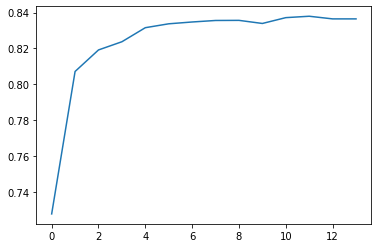

In [133]:
plt.plot(history_1.history['accuracy'])

## HyperParameter set-2 for CNN

In [ ]:
params1 = {
    'dropout': (0.8),
    'filters': (256),
    'kernel_size': (7),
    'strides': (1),
    'pooling': GlobalMaxPooling1D(),  # MaxPool1D(), AveragePooling1D(), 
    'hidden_dims': (128),
    'learning_rate': (0.01),
    'batch_size': (100),
    'optimizer': ('SGD')
}
loss = "categorical_crossentropy"
epochs = 100

In [ ]:
returned_history1,returned_model1 = langIDCNN(X_train,y_train,X_val,y_val,params1)

0.8
Epoch 1/100
471/471 [==============================] - 3s 7ms/step - loss: 2.4158 - accuracy: 0.3237 - val_loss: 2.2742 - val_accuracy: 0.3522
Epoch 2/100
471/471 [==============================] - 3s 6ms/step - loss: 2.1448 - accuracy: 0.3625 - val_loss: 2.1408 - val_accuracy: 0.3522
Epoch 3/100
471/471 [==============================] - 3s 6ms/step - loss: 2.0219 - accuracy: 0.4245 - val_loss: 2.0446 - val_accuracy: 0.3889
Epoch 4/100
471/471 [==============================] - 3s 6ms/step - loss: 1.9031 - accuracy: 0.4747 - val_loss: 1.9479 - val_accuracy: 0.4944
Epoch 5/100
471/471 [==============================] - 3s 6ms/step - loss: 1.8163 - accuracy: 0.4997 - val_loss: 1.8681 - val_accuracy: 0.5249
Epoch 6/100
471/471 [==============================] - 3s 6ms/step - loss: 1.7582 - accuracy: 0.5111 - val_loss: 1.7949 - val_accuracy: 0.5326
Epoch 7/100
471/471 [==============================] - 3s 6ms/step - loss: 1.7195 - accuracy: 0.5187 - val_loss: 1.7392 - val_accuracy: 0.

## Evaluation of set 2

In [ ]:
returned_model1.evaluate(test_data,test_classes_categorical)

52460/52460 [==============================] - 4s 79us/step


[1.1007603782656243, 0.6905070543289185]

## HyperParameter set-3 for CNN

In [134]:
params2 = {
    'dropout': (0.1),
    'filters': (512),
    'kernel_size': (3),
    'strides': (2),
    'pooling': GlobalMaxPooling1D(),  # MaxPool1D(), AveragePooling1D(), 
    'hidden_dims': (128),
    'learning_rate': (0.01),
    'batch_size': (75),
    'optimizer': ('adam')
}
loss = "categorical_crossentropy"
epochs = 100

In [135]:
returned_history2,returned_model2 = langIDCNN(X_train,y_train,X_val,y_val,params2)

NameError: ignored

## Evaluation of set-3

In [ ]:
returned_model2.evaluate(test_data,test_classes_categorical)

52460/52460 [==============================] - 4s 84us/step


[0.22429007608204007, 0.9346930980682373]

## HyperParameter set-4 for CNN

In [ ]:
params3 = {
    'dropout': (0.6),
    'filters': (128),
    'kernel_size': (5),
    'strides': (1),
    'pooling': GlobalMaxPooling1D(),  # MaxPool1D(), AveragePooling1D(), 
    'hidden_dims': (256),
    'learning_rate': (0.1),
    'batch_size': (50),
    'optimizer': ('adam')
}
loss = "categorical_crossentropy"
epochs = 100

In [ ]:
returned_history3,returned_model3 = langIDCNN(X_train,y_train,X_val,y_val,params3)

0.6
Epoch 1/100
942/942 [==============================] - 7s 7ms/step - loss: 2.2702 - accuracy: 0.3689 - val_loss: 2.0267 - val_accuracy: 0.3522
Epoch 2/100
942/942 [==============================] - 6s 6ms/step - loss: 2.0459 - accuracy: 0.3539 - val_loss: 2.0238 - val_accuracy: 0.3522
Epoch 3/100
942/942 [==============================] - 6s 7ms/step - loss: 2.0448 - accuracy: 0.3539 - val_loss: 2.0301 - val_accuracy: 0.3522
Epoch 4/100
942/942 [==============================] - 6s 7ms/step - loss: 2.0447 - accuracy: 0.3539 - val_loss: 2.0264 - val_accuracy: 0.3522
Epoch 5/100
942/942 [==============================] - 6s 6ms/step - loss: 2.0451 - accuracy: 0.3534 - val_loss: 2.0250 - val_accuracy: 0.3522
Epoch 6/100
942/942 [==============================] - 6s 6ms/step - loss: 2.0453 - accuracy: 0.3539 - val_loss: 2.0314 - val_accuracy: 0.3522
Epoch 7/100
942/942 [==============================] - 6s 6ms/step - loss: 2.0443 - accuracy: 0.3539 - val_loss: 2.0281 - val_accuracy: 0.

## Evaluation of set-4

In [ ]:
returned_model3.evaluate(test_data,test_classes_categorical)

52460/52460 [==============================] - 3s 65us/step


[0.47139752954150216, 0.8708158731460571]

## HyperParameter set-5 for CNN

In [ ]:
params4 = {
    'dropout': (0.9),
    'filters': (512),
    'kernel_size': (5),
    'strides': (1),
    'pooling': GlobalMaxPooling1D(),  # MaxPool1D(), AveragePooling1D(), 
    'hidden_dims': (256),
    'learning_rate': (0.01),
    'batch_size': (100),
    'optimizer': ('adam')
}
loss = "categorical_crossentropy"
epochs = 100

In [ ]:
returned_history4,returned_model4 = langIDCNN(X_train,y_train,X_val,y_val,params4)

0.9
Epoch 1/100
471/471 [==============================] - 4s 10ms/step - loss: 1.8866 - accuracy: 0.4684 - val_loss: 1.6438 - val_accuracy: 0.5498
Epoch 2/100
471/471 [==============================] - 4s 9ms/step - loss: 1.9412 - accuracy: 0.4193 - val_loss: 1.6773 - val_accuracy: 0.5469
Epoch 3/100
471/471 [==============================] - 4s 9ms/step - loss: 1.9551 - accuracy: 0.4031 - val_loss: 1.6814 - val_accuracy: 0.5460
Epoch 4/100
471/471 [==============================] - 4s 9ms/step - loss: 2.0148 - accuracy: 0.3872 - val_loss: 1.6935 - val_accuracy: 0.5486
Epoch 5/100
471/471 [==============================] - 4s 9ms/step - loss: 2.0053 - accuracy: 0.3720 - val_loss: 1.7025 - val_accuracy: 0.5486
Epoch 6/100
471/471 [==============================] - 4s 9ms/step - loss: 2.0040 - accuracy: 0.3728 - val_loss: 1.6994 - val_accuracy: 0.5486
Epoch 7/100
471/471 [==============================] - 4s 9ms/step - loss: 2.0128 - accuracy: 0.3694 - val_loss: 1.6942 - val_accuracy: 0

## Evaluation of set-5

In [ ]:
returned_model4.evaluate(test_data,test_classes_categorical)

1636/1636 [==============================] - 4s 3ms/step - loss: 1.6849 - accuracy: 0.5434


[1.6848516464233398, 0.543430507183075]

## Talos for GridSearch


In [136]:
params = {
    'dropout': [0.1, 0.5],
    'filters': [512, 216],
    'kernel_size': [3,7],
    'strides': [1,2],
    'pooling': [GlobalMaxPooling1D()],  # MaxPool1D(), AveragePooling1D(), 
    'hidden_dims': [128,256],
    'learning_rate': [0.01, 0.001],
    'batch_size': [64, 128],
    'optimizer': ['adam','SGD']
}
loss = "categorical_crossentropy"
epochs = 100

In [137]:
verbose = 0

In [ ]:
t = talos.Scan(x=X_train_pad,
               y=y_train_cat,
               x_val =X_val_pad,
               y_val =y_val_cat,
               model=langIDCNN,
               params=params,
               experiment_name = "oihoihoih")



  0%|          | 0/256 [00:00<?, ?it/s]

0.1
Epoch 00011: early stopping


  1%|          | 2/256 [06:30<13:45:56, 195.11s/it]

  0%|          | 1/256 [00:39<2:47:18, 39.37s/it]

0.1
Epoch 00012: early stopping



  1%|          | 2/256 [02:02<4:34:29, 64.84s/it]

0.1



  1%|          | 3/256 [06:48<11:39:39, 165.93s/it]

0.1


##### Summary of parameter combinations and the respective losses

In [ ]:
# summary of talos parameter combinations
t.data

start              end   duration  round_epochs  val_loss  \
0    11/08/20-001007  11/08/20-001040  33.101430             9  0.408170   
1    11/08/20-001040  11/08/20-001112  32.429168            11  0.494282   
2    11/08/20-001112  11/08/20-001153  40.951956            12  0.756854   
3    11/08/20-001153  11/08/20-001222  28.143952            10  0.702594   
4    11/08/20-001222  11/08/20-001338  75.782918            22  0.276476   
..               ...              ...        ...           ...       ...   
379  11/08/20-051520  11/08/20-051554  34.587987            10  0.742602   
380  11/08/20-051555  11/08/20-051659  63.738936            14  0.361452   
381  11/08/20-051700  11/08/20-051746  45.483428            13  0.435945   
382  11/08/20-051747  11/08/20-051854  67.493288            15  0.317048   
383  11/08/20-051855  11/08/20-051950  54.517562            16  0.457549   

     val_accuracy      loss  accuracy  batch_size  dropout  filters  \
0        0.902174  0.339253  0.896262         128      0.2      128   
1        0.888005  0.383316  0.883128         128      0.2      128   
2        0.844332  0.630444  0.839692         128      0.2      128   
3        0.830939  0.616384  0.837082         128      0.2      128   
4        0.916731  0.180942  0.938426         128      0.2      128   
..            ...       ...       ...         ...      ...      ...   
379      0.862966  0.384217  0.892251         256      0.1      256   
380      0.914208  0.053487  0.982401         256      0.1      256   
381      0.893245  0.070452  0.976492         256      0.1      256   
382      0.917120  0.074154  0.973602         256      0.1      256   
383      0.907803  0.070238  0.975823         256      0.1      256   

     hidden_dims  kernel_size  learning_rate optimizer  \
0            128            3          0.010      Adam   
1            128            3          0.010      Adam   
2            128            3          0.010   RMSprop   
3            128            3          0.010   RMSprop   
4            128            3          0.001      Adam   
..           ...          ...            ...       ...   
379          512            7          0.010   RMSprop   
380          512            7          0.001      Adam   
381          512            7          0.001      Adam   
382          512            7          0.001   RMSprop   
383          512            7          0.001   RMSprop   

                                               pooling  strides  
0    <keras.layers.pooling.GlobalMaxPooling1D objec...        1  
1    <keras.layers.pooling.GlobalMaxPooling1D objec...        2  
2    <keras.layers.pooling.GlobalMaxPooling1D objec...        1  
3    <keras.layers.pooling.GlobalMaxPooling1D objec...        2  
4    <keras.layers.pooling.GlobalMaxPooling1D objec...        1  
..                                                 ...      ...  
379  <keras.layers.pooling.GlobalMaxPooling1D objec...        2  
380  <keras.layers.pooling.GlobalMaxPooling1D objec...        1  
381  <keras.layers.pooling.GlobalMaxPooling1D objec...        2  
382  <keras.layers.pooling.GlobalMaxPooling1D objec...        1  
383  <keras.layers.pooling.GlobalMaxPooling1D objec...        2  

[384 rows x 17 columns]

#### Getting best model computed by Talos

In [ ]:
best_model = t.best_model(metric='val_accuracy', asc=False)

predicted_list = best_model.predict(test_data)

## Accuracy of the model

In [ ]:
accuracy_score(predicted_list.argmax(axis=1), test_classes_categorical.argmax(axis=1))

0.9195712523133868

### Confusion Matrix

In [ ]:
label_dict = pd.Series(df_test.label.values,index=df_test.label_index).to_dict()

test_list = test_classes_categorical.argmax(axis=1)
predicted_list = predicted_list.argmax(axis=1)
test_list_label = [label_dict[x] for x in test_list]
predicted_list_label = [label_dict[x] for x in predicted_list]

In [ ]:
confusion_matrix_final = confusion_matrix(test_list_label, predicted_list_label)

In [ ]:
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix_final)
confusion_matrix_dataframe.head()

0   1   2     3     4   5   6   7   8   9   ...  11  12  13  14  15  16  \
0  528   0   0     0     0   0   0   0   0   0  ...   0   0   0   0   0   0   
1    0  42   0     2     0   2   0   0   0   0  ...   0   2   0   0   0   0   
2    0   0   9     0     1   0   0   0   0   0  ...   0   0   0   0   0   0   
3    0   0   0  4616    15  11   0  13   3   3  ...   0   5   0   1   1   0   
4    0   0   0    15  1403  11   0   3   4   0  ...   0   0   0   8   0   0   

   17  18  19  20  
0   0   0   0   1  
1   0   0   0   2  
2   0   0   0   1  
3   1   0   0  88  
4   0   0   1  31  

[5 rows x 21 columns]

In [ ]:
confusion_matrix_dataframe.reset_index(inplace=True)
confusion_matrix_dataframe.head()

index    0   1  2     3     4   5  6   7  8  ...  11  12  13  14  15  16  \
0      0  528   0  0     0     0   0  0   0  0  ...   0   0   0   0   0   0   
1      1    0  42  0     2     0   2  0   0  0  ...   0   2   0   0   0   0   
2      2    0   0  9     0     1   0  0   0  0  ...   0   0   0   0   0   0   
3      3    0   0  0  4616    15  11  0  13  3  ...   0   5   0   1   1   0   
4      4    0   0  0    15  1403  11  0   3  4  ...   0   0   0   8   0   0   

   17  18  19  20  
0   0   0   0   1  
1   0   0   0   2  
2   0   0   0   1  
3   1   0   0  88  
4   0   0   1  31  

[5 rows x 22 columns]

In [ ]:
confusion_matrix_dataframe= confusion_matrix_dataframe.replace({"index": label_dict})
confusion_matrix_dataframe = confusion_matrix_dataframe.set_index('index')

In [ ]:
confusion_matrix_dataframe.columns = [label_dict[x] for x in confusion_matrix_dataframe.columns]

In [ ]:
confusion_matrix_dataframe

ar  de  el    en    es   fr  he   id  it    ja  ...  ms  nl  pl   pt  \
index                                                   ...                    
ar     528   0   0     0     0    0   0    0   0     0  ...   0   0   0    0   
de       0  42   0     2     0    2   0    0   0     0  ...   0   2   0    0   
el       0   0   9     0     1    0   0    0   0     0  ...   0   0   0    0   
en       0   0   0  4616    15   11   0   13   3     3  ...   0   5   0    1   
es       0   0   0    15  1403   11   0    3   4     0  ...   0   0   0    8   
fr       0   0   0    14     5  196   0    1   0     0  ...   0   2   0    0   
he       0   0   0     0     0    0  13    0   0     0  ...   0   0   0    0   
id       0   0   0    24     2    4   0  730   0     1  ...   7   2   0    1   
it       0   0   0     2     6    1   0    0  63     0  ...   0   0   0    1   
ja       0   0   0     3     0    0   0    0   0  2463  ...   0   0   1    0   
ko       0   0   0     0     0    0   0    0   0     0  ...   0   0   0    0   
ms       0   0   0     2     0    0   0   21   0     0  ...   5   1   0    0   
nl       0   0   0     4     0    5   0    0   0     0  ...   0  32   0    0   
pl       1   1   0     4     0    0   0    0   0     0  ...   0   0  16    0   
pt       0   0   0    23    39   20   0    3   5     0  ...   0   0   0  584   
ru       0   0   0     0     0    0   0    0   0     0  ...   0   0   0    0   
sv       0   3   0     3     0    0   0    0   0     0  ...   0   1   0    0   
th       0   0   0     0     0    0   0    0   0     1  ...   0   0   0    0   
tl       0   0   0    18     2    0   0    6   0     0  ...   0   0   0    1   
tr       0   0   0     3     0    0   0    5   0     0  ...   0   1   0    1   
und      9   1   0   211    65   20   0   78   5    16  ...   4   4   2   15   

        ru  sv  th  tl   tr  und  
index                             
ar       0   0   0   0    0    1  
de       0   0   0   0    0    2  
el       0   0   0   0    0    1  
en       1   0   1   0    0   88  
es       0   0   0   0    1   31  
fr       0   0   0   0    0    6  
he       0   0   0   0    0    1  
id       0   0   1   5    0   39  
it       0   0   0   0    0    3  
ja       0   0   0   0    0    9  
ko       0   0   0   0    0    2  
ms       0   0   0   1    1    0  
nl       0   0   0   0    0    2  
pl       0   0   0   0    0    4  
pt       0   0   0   0    1   24  
ru     242   0   0   0    0    1  
sv       0   7   0   0    0    1  
th       0   0  96   0    0    0  
tl       0   0   0  54    0    8  
tr       0   0   0   0  158    6  
und      6   0   2   2    7  560  

[21 rows x 21 columns]

### Heatmap for Confusion matrix

In [ ]:
import seaborn as sn

<AxesSubplot:ylabel='index'>

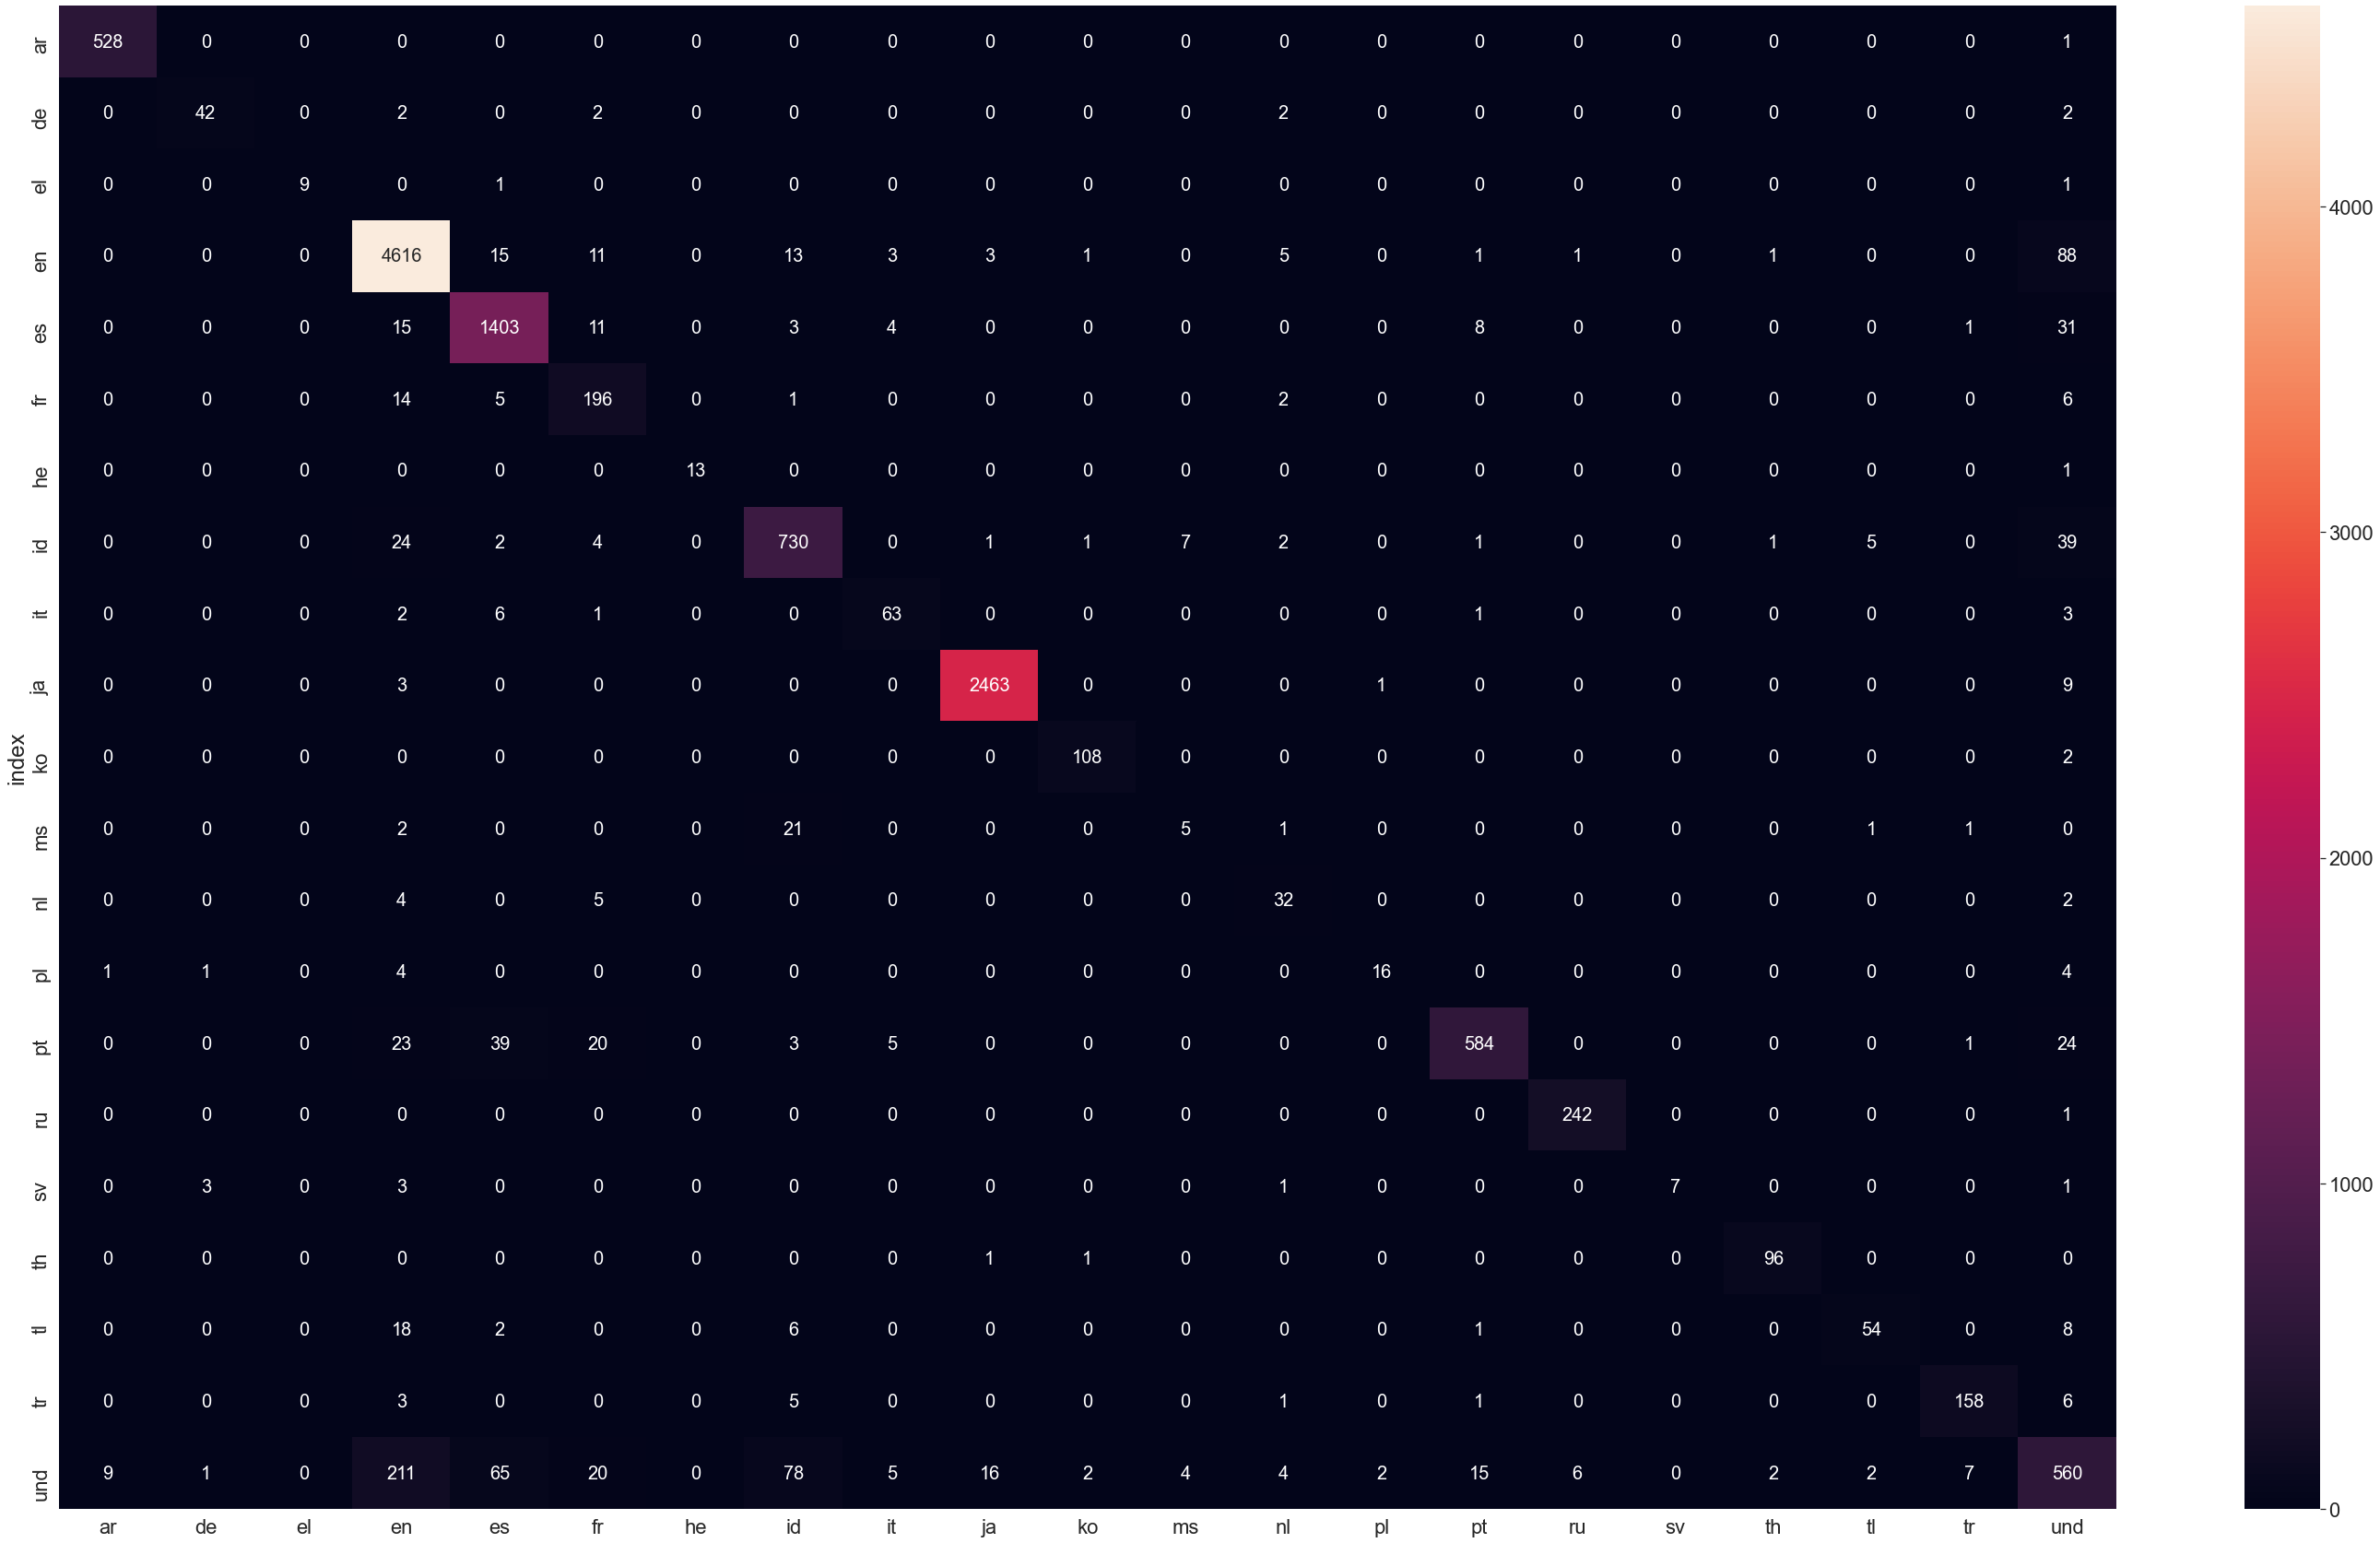

In [ ]:
plt.figure(figsize = (50, 30))
sn.set(font_scale=2) 
sn.heatmap(confusion_matrix_dataframe, annot=True, annot_kws={"size": 20}, fmt='.4g')

## Plotting correlation between Hyperparameters from Talos dataframe

##### Creating a dataframe from talos object and filtering hyperaparameter subset from it

In [ ]:
params_df = t.data
params_df = params_df[['batch_size','dropout', 'filters','hidden_dims', 'kernel_size', 'learning_rate','optimizer','pooling','strides']]

In [ ]:
# changing pooling to a single value since only 1 pooling type used in Talos Scan
params_df['pooling'] = 1

In [ ]:
# function to replace values in the optimizer column with indexes
def replace_optim(x):
  if x == 'Adam':
    return 0
  else:
    return 1

In [ ]:
# applying function to change values of optimizer to indexes and dropping old optimizer column
params_df['optimizer_num'] = params_df['optimizer'].apply(replace_optim)
params_df.drop(columns='optimizer', inplace=True, axis=1)

<AxesSubplot:>

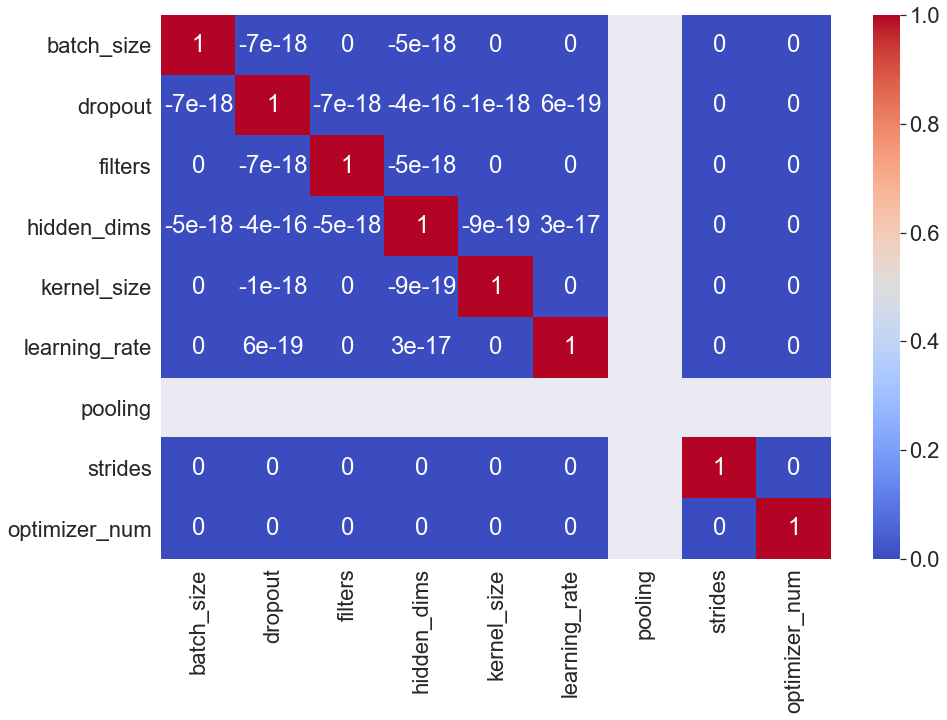

In [ ]:
# plotting correlation plot for hyperparameters
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sn.heatmap(params_df.corr(), annot = True,cmap= 'coolwarm', fmt='.1g')